In [1]:
#Contents
# Coding Best Practices - Instacarty Analysis Final Report 

### Question 1 - Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [7]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [8]:
#import df_customer_ords_merged dataset
path = '/Users/malikpressley/Desktop/Achievement 4/Instacart Basket Analysis'

In [74]:
df_customer_ords_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_customer_ords_merged.pkl'))

In [10]:
df_customer_ords_merged

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependents,family_status,income,...,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,customer_income,median_days_since_prior_order,frequent_customer
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Most orders,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Low-range product,Most orders,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,...,Low-range product,Average orders,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,...,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN
30328759,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,...,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN
30328760,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,...,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN
30328761,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,...,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN


In [11]:
# calculate the total spending for each hour of the day
hourly_spending = df_customer_ords_merged.groupby('order_hour_of_day')['prices'].sum()

In [12]:
#create sample for line chart displaying times of day when people spend the most money

In [13]:
np.random.seed(4)
dev = np.random.rand(len(df_customer_ords_merged)) <= 0.7

In [14]:
# Create a list holding True/False value to the test np.random.rant() < = 0.7
dev = np.random.rand(len(df_customer_ords_merged)) <= 0.7

In [15]:
# Store 70% of the sample in the dataframe big
big = df_customer_ords_merged[dev]

In [16]:
# Store 30% of the sample in the dataframe small
small = df_customer_ords_merged[~dev]

In [17]:
#create subset to speed up processing time, only including columns needed for table
df_3 = small[['order_hour_of_day','prices']]

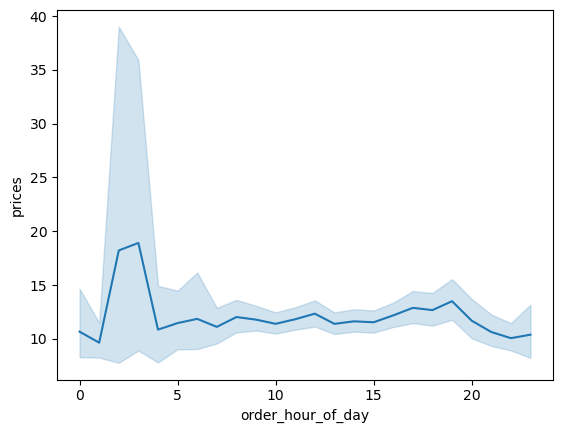

In [18]:
#create chart
line_time_most_money = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [19]:
#export in form of image file
line_time_most_money.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_time_most_money.png'))

In [20]:
# determine which products are most popular / which department has highest frequency of orders

In [21]:
#see notebook 4.4 for data dictionary

In [22]:
df_customer_ords_merged['department_id'].value_counts(dropna = False)

4     8894907
16    5066698
19    2706641
7     2520632
1     2076535
13    1747119
3     1097168
15     994292
20     981150
9      805645
17     686604
12     661560
14     656252
11     416261
18     401315
6      250293
5      140982
8       91093
21      66879
2       33925
10      32812
Name: department_id, dtype: int64

In [23]:
# produce - dairy eggs - snacks - beverages - frozen - pantry - bakery are the top performing departments

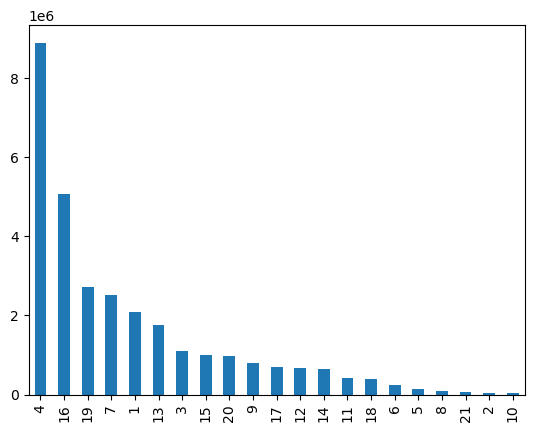

In [24]:
bar_top_perform_dep = df_customer_ords_merged['department_id'].value_counts().plot.bar()

In [25]:
#export in form of image file
bar_top_perform_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_perform_dep.png'))

In [26]:
#Are there differences in order habits based on loyalty status? 

In [27]:
#calculate mean for average time between orders
df_order_habits = df_customer_ords_merged.groupby('loyalty_flag')['days_since_prior_order'].mean()

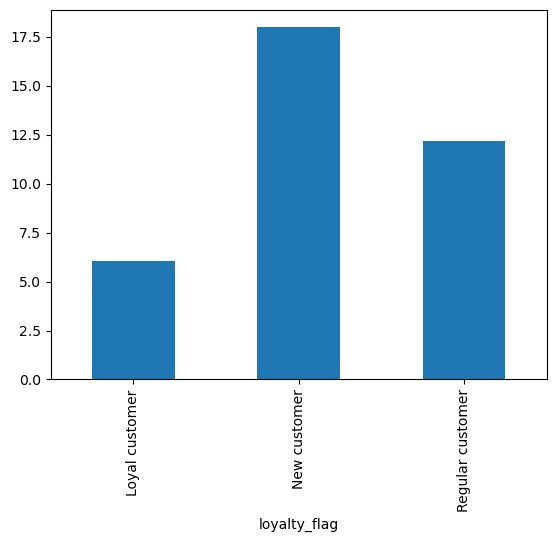

In [28]:
bar_order_habits = df_order_habits.plot.bar()

In [29]:
#export in form of image file
bar_order_habits.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_habits.png'))

In [30]:
pd.set_option('display.max_columns', None)

In [31]:
df_customer_ords_merged

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependents,family_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,customer_income,median_days_since_prior_order,frequent_customer
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,2,0,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,1,1,both,Mid-range product,Most orders,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,2,1,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,6184,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,2,1,both,Low-range product,Most orders,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,6184,6184,Clementines,32,4,4.3,443894,2984525,prior,4,1,17,19.0,2,1,both,Low-range product,Average orders,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,38754,38750,"Protein Bar, Chocolate Pretzel",3,19,4.7,1334022,2859858,prior,3,6,11,12.0,11,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN
30328759,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,39073,39069,Chocolate Coconut Almond Protein Bar,3,19,1.8,1334022,2859858,prior,3,6,11,12.0,2,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN
30328760,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,39976,39972,Chocolate Fudge High Protein Bar,3,19,4.0,1334022,2859858,prior,3,6,11,12.0,5,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN
30328761,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,41431,41427,Cookies 'N Cream Protein Bar,3,19,2.0,1334022,2859858,prior,3,6,11,12.0,4,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN


### Question 2 - Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### The security implications that exist for this new data include names, income, family status, number of dependents. Normally, I could ask if I should scrub this data clean and move forward - even if it not always reccomended. However, for this time I will simply state in my citations that these columns were artificially created for this project

### Question 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. 

### Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [32]:
#create region function

In [33]:
df_customer_ords_merged.loc[df_customer_ords_merged['State'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']), 'Region'] = 'Region 1_Northeast'

In [34]:
df_customer_ords_merged.loc[df_customer_ords_merged ['State'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']), 'Region'] = 'Region 2_Midwest'

In [35]:
df_customer_ords_merged.loc[df_customer_ords_merged['State'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']), 'Region'] = 'Region 3_South'

In [36]:
df_customer_ords_merged.loc[df_customer_ords_merged['State'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']), 'Region'] = 'Region 4_West'


In [37]:
#check results

In [38]:
df_customer_ords_merged['Region'].value_counts(dropna = False)

Region 3_South        10099817
Region 4_West          7765088
Region 2_Midwest       7107586
Region 1_Northeast     5356272
Name: Region, dtype: int64

In [39]:
#Determine whether there’s a difference in spending habits between the different U.S. regions

In [40]:
crosstab = pd.crosstab(df_customer_ords_merged['Region'], df_customer_ords_merged['customer_income'], dropna = False)

In [41]:
crosstab

customer_income,High spender,Low spender
Region,,
Region 1_Northeast,102905,5253367
Region 2_Midwest,148321,6959265
Region 3_South,197110,9902707
Region 4_West,149922,7615166


In [42]:
df_customer_ords_merged

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependents,family_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,customer_income,median_days_since_prior_order,frequent_customer,Region
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,2,0,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,1,1,both,Mid-range product,Most orders,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,2,1,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,6184,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,2,1,both,Low-range product,Most orders,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,6184,6184,Clementines,32,4,4.3,443894,2984525,prior,4,1,17,19.0,2,1,both,Low-range product,Average orders,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30328758,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,38754,38750,"Protein Bar, Chocolate Pretzel",3,19,4.7,1334022,2859858,prior,3,6,11,12.0,11,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN,Region 1_Northeast
30328759,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,39073,39069,Chocolate Coconut Almond Protein Bar,3,19,1.8,1334022,2859858,prior,3,6,11,12.0,2,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN,Region 1_Northeast
30328760,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,39976,39972,Chocolate Fudge High Protein Bar,3,19,4.0,1334022,2859858,prior,3,6,11,12.0,5,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN,Region 1_Northeast
30328761,80148,Cynthia,Noble,Female,New York,55,2020-04-01,1,married,57095,41431,41427,Cookies 'N Cream Protein Bar,3,19,2.0,1334022,2859858,prior,3,6,11,12.0,4,0,both,Low-range product,Most orders,Regularly busy,Most orders,4,New customer,4.078571,Low spender,12.0,NaN,Region 1_Northeast


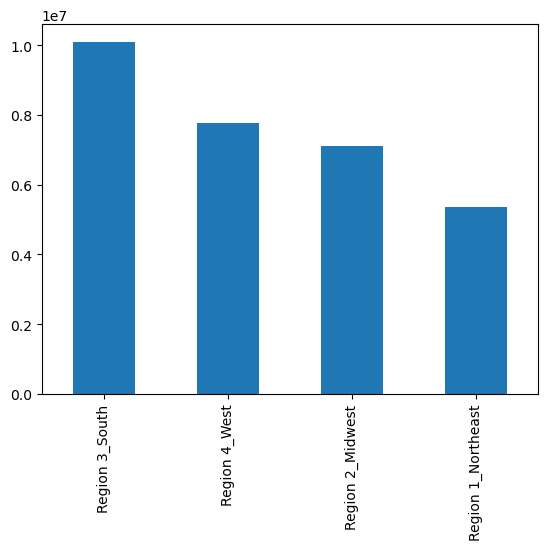

In [43]:
# are there differnces in ordering habits based on a customers region?
bar_top_perform_reg = df_customer_ords_merged['Region'].value_counts().plot.bar()

In [44]:
#export in form of image file
bar_top_perform_reg.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_top_perform_reg.png'))

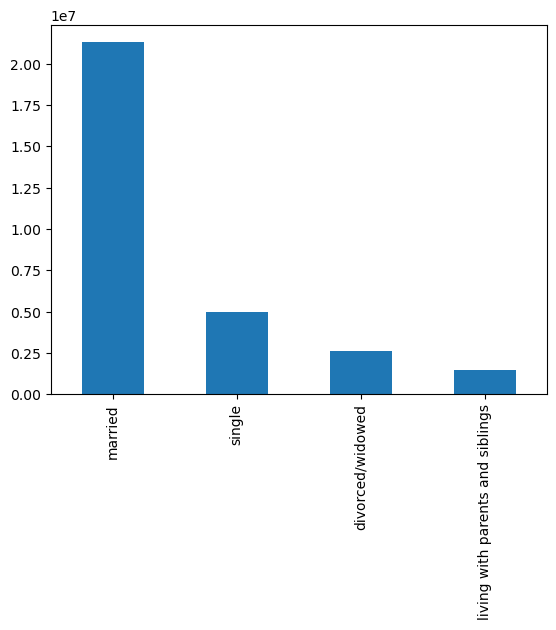

In [45]:
bar_family_status = df_customer_ords_merged['family_status'].value_counts().plot.bar()

### Question 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [46]:
df_customer_ords_merged.loc[df_customer_ords_merged['max_order'] < 5, 'low_activity_customer'] = 'Low Activity'

In [47]:
#print frequency of low activity customer column

In [48]:
df_customer_ords_merged['low_activity_customer'].value_counts(dropna = False) 

NaN             29303281
Low Activity     1025482
Name: low_activity_customer, dtype: int64

In [49]:
#exclude low activity customers from the data

In [50]:
df_customer_ords_merged = df_customer_ords_merged.loc[df_customer_ords_merged['low_activity_customer'] != 'Low Activity']

In [51]:
df_customer_ords_merged.head(5)

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependents,family_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,customer_income,median_days_since_prior_order,frequent_customer,Region,low_activity_customer
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,2,0,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest,NaN
1,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443897,1285508,prior,7,5,15,11.0,1,1,both,Mid-range product,Most orders,Regularly busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest,NaN
2,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443898,2578584,prior,8,1,15,10.0,2,1,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest,NaN
3,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,6184,6184,Clementines,32,4,4.3,443893,2524893,prior,3,3,11,30.0,2,1,both,Low-range product,Most orders,Least busy,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest,NaN
4,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,6184,6184,Clementines,32,4,4.3,443894,2984525,prior,4,1,17,19.0,2,1,both,Low-range product,Average orders,Busiest days,Average orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest,NaN


In [52]:
#export sample 

In [53]:
df_low_activity_customer = df_customer_ords_merged.loc[df_customer_ords_merged['low_activity_customer'] == 'Low Activity']

In [54]:
df_low_activity_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_low_activity_customer.pkl'))

### Question 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [55]:
#create single young adult using .loc command

In [56]:
df_customer_ords_merged.loc[(df_customer_ords_merged['Age'] < 30) & (df_customer_ords_merged['income'] <= 40000) & (df_customer_ords_merged['number_of_dependents'] == 0), 'customer_profile'] = 'Single Young Adult'

/var/folders/kg/70nhdryn2cb2xg36fgtmq9hh0000gn/T/ipykernel_42240/1826425150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customer_ords_merged.loc[(df_customer_ords_merged['Age'] < 30) & (df_customer_ords_merged['income'] <= 40000) & (df_customer_ords_merged['number_of_dependents'] == 0), 'customer_profile'] = 'Single Young Adult'


In [57]:
# create single adult using .loc command

In [58]:
df_customer_ords_merged.loc[(df_customer_ords_merged['Age'] >= 30) & (df_customer_ords_merged['income'] <= 40000) & (df_customer_ords_merged['number_of_dependents'] == 0), 'customer_profile'] = 'Single Adult'

In [59]:
# create young parent using .loc command

In [60]:
df_customer_ords_merged.loc[(df_customer_ords_merged['number_of_dependents'] > 0) & (df_customer_ords_merged['income'] <= 40000), 'customer_profile'] = 'Young Parent'

In [61]:
#create parent using .loc command

In [62]:
df_customer_ords_merged.loc[(df_customer_ords_merged['number_of_dependents'] > 0) & (df_customer_ords_merged['income'] > 40000), 'customer_profile'] = 'Parent'

In [63]:
#check results

In [64]:
df_customer_ords_merged.head(1)

,user_id,First Name,Surname,Gender,State,Age,date_joined,number_of_dependents,family_status,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,price_range_loc,busiest_day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_product_price,customer_income,median_days_since_prior_order,frequent_customer,Region,low_activity_customer,customer_profile
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665,195,196,Soda,77,7,9.0,443895,2543867,prior,5,1,9,30.0,2,0,both,Mid-range product,Most orders,Busiest days,Most orders,8,New customer,8.205882,Low spender,19.0,NaN,Region 2_Midwest,NaN,Parent


### Question 6 - Create an appropriate visualization to show the distribution of profiles.

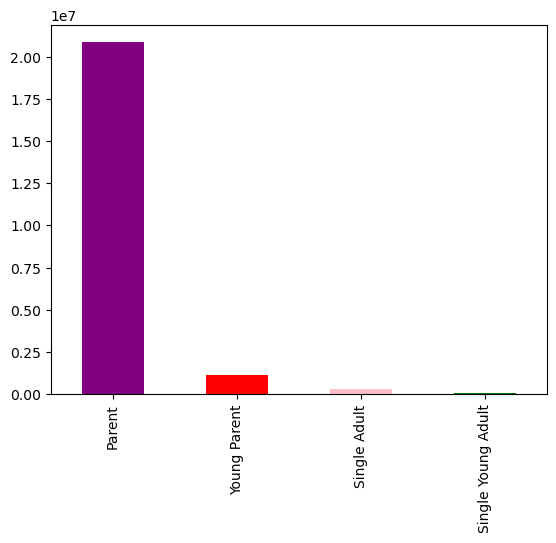

In [65]:
bar_distribution_of_profiles = df_customer_ords_merged['customer_profile'].value_counts().plot.bar(color =['purple', 'red', 'pink','green'])

In [66]:
#export in form of image file
bar_distribution_of_profiles.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_distribution_of_profiles.png'))

### Question 7 - Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [67]:
df_customer_ords_merged['customer_profile'].describe()

count     22361756
unique           4
top         Parent
freq      20843545
Name: customer_profile, dtype: object

In [68]:
df_customer_ords_merged.groupby('customer_profile').agg({
    'Age': ['max', 'mean', 'min'],
    'income': ['max', 'mean', 'min'],
    'number_of_dependents': ['max', 'mean', 'min']
})

Age                 income                        \
                   max       mean min     max           mean    min   
customer_profile                                                      
Parent              81  49.659337  18  593901  103201.121000  40004   
Single Adult        81  52.791255  30   39990   34440.851399  25903   
Single Young Adult  29  23.653203  18   39989   33447.622888  25979   
Young Parent        81  45.602010  18   39999   34266.674795  25911   

                   number_of_dependents                
                                    max      mean min  
customer_profile                                       
Parent                                3  2.001840   1  
Single Adult                          0  0.000000   0  
Single Young Adult                    0  0.000000   0  
Young Parent                          3  2.013624   1

### Question 8 - Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Question 9 - Produce suitable charts to illustrate your results and export them in your project folder.

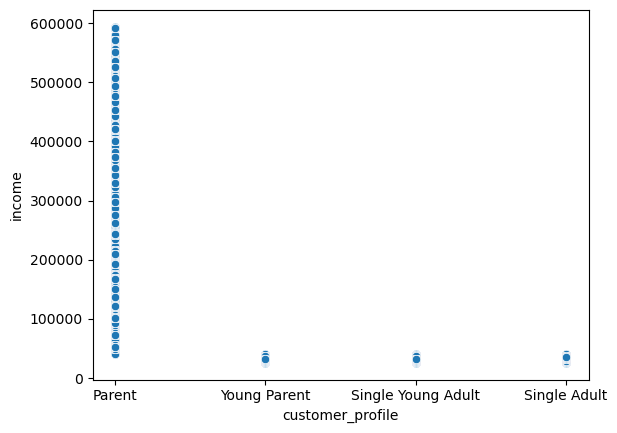

In [69]:
scatter = sns.scatterplot(x = 'customer_profile', y = 'income',data = df_customer_ords_merged)

In [70]:
#export in form of image file
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter.png'))

In [71]:
print(df_customer_ords_merged['department_id'])

0            7
1            7
2            7
3            4
4            4
            ..
30328722    11
30328723    11
30328724    11
30328725    13
30328726    19
Name: department_id, Length: 29303281, dtype: int64


In [72]:
#export data to sent to client